# Flight price prediction

###  Problem statement

The project involves taking data, analyzing it, processing it to ultimately apply the chosen machine learning model to indicate price of flight based on given factors and then deploying the model on the server in the form of a web application.

- Data Collection
- Data Checks 
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose of best model based on evaluation metrics
- Model Deployment

### Data Collection

- Source of data: hhttps://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction?select=Clean_Dataset.csv

Dataset contains information about flight booking options from the website Easemytrip for flight travel between India's top 6 metro cities. There are 300261 datapoints and 11 features in the cleaned dataset.

### Import data and Required libraries

Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [19]:
df = pd.read_csv('data/Clean_Dataset.csv')

In [20]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [21]:
df.shape

(300153, 12)

### Dataset information - Survey questions

1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.
2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.
3) Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.
4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.
5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.
7) Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.
8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.
9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.
10) Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.
11) Price: Target variable stores information of the ticket price.


#### Datatypes: 
- float64 - 1 of features
- int64 - 3 of features
- object(categorial) - 8 of features

### Data Checks to perform
1. Check Missing values
2. Check Duplicates
3. Check data type
4. Check the number of unique values of each column
5. Check statistics of data set
6. Check various categories present in the different categorical column

### Check Missing values

In [22]:
df.isna().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

### Check Duplicates

In [23]:
df.duplicated().sum()

0

### Check data types

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


### Checking the number of unique values of each column

In [25]:
df.nunique()


Unnamed: 0          300153
airline                  6
flight                1561
source_city              6
departure_time           6
stops                    3
arrival_time             6
destination_city         6
class                    2
duration               476
days_left               49
price                12157
dtype: int64

### Check statistics of data set

In [26]:
df.describe(include = 'all')

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
count,300153.000000,300153,300153,300153,300153,300153,300153,300153,300153,300153.000000,300153.000000,300153.000000
unique,NaN,6,1561,6,6,3,6,6,2,NaN,NaN,NaN
top,NaN,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy,NaN,NaN,NaN
freq,NaN,127859,3235,61343,71146,250863,91538,59097,206666,NaN,NaN,NaN
mean,150076.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.221021,26.004751,20889.660523
std,86646.852011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.191997,13.561004,22697.767366
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.830000,1.000000,1105.000000
25%,75038.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.830000,15.000000,4783.000000
50%,150076.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.250000,26.000000,7425.000000
75%,225114.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.170000,38.000000,42521.000000


#### Insight from above data

- There is no duplicate


In [27]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [29]:
print("Categories in 'airline' variable:     ",end=" " )
print(df['airline'].unique())

print("Categories in 'source_city' variable:  ",end=" ")
print(df['source_city'].unique())

print("Categories in 'departure_time' variable:  ",end=" ")
print(df['departure_time'].unique())

print("Categories in 'stops' variable:     ",end=" " )
print(df['stops'].unique())

print("Categories in 'arrival_time' variable:     ",end=" " )
print(df['arrival_time'].unique())

print("Categories in 'destination_city' variable:     ",end=" " )
print(df['destination_city'].unique())

print("Categories in 'class' variable:     ",end=" " )
print(df['class'].unique())



Categories in 'airline' variable:      ['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']
Categories in 'source_city' variable:   ['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
Categories in 'departure_time' variable:   ['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']
Categories in 'stops' variable:      ['zero' 'one' 'two_or_more']
Categories in 'arrival_time' variable:      ['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']
Categories in 'destination_city' variable:      ['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']
Categories in 'class' variable:      ['Economy' 'Business']


#### Defined numerical & categorical columns

In [32]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 4 numerical features : ['Unnamed: 0', 'duration', 'days_left', 'price']

We have 8 categorical features : ['airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']


In [33]:
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


### Exploring Data ( Visualization )
####  Visualize average score distribution to make some conclusion.
- Heatmap
- Kernel Distribution Function (KDE)

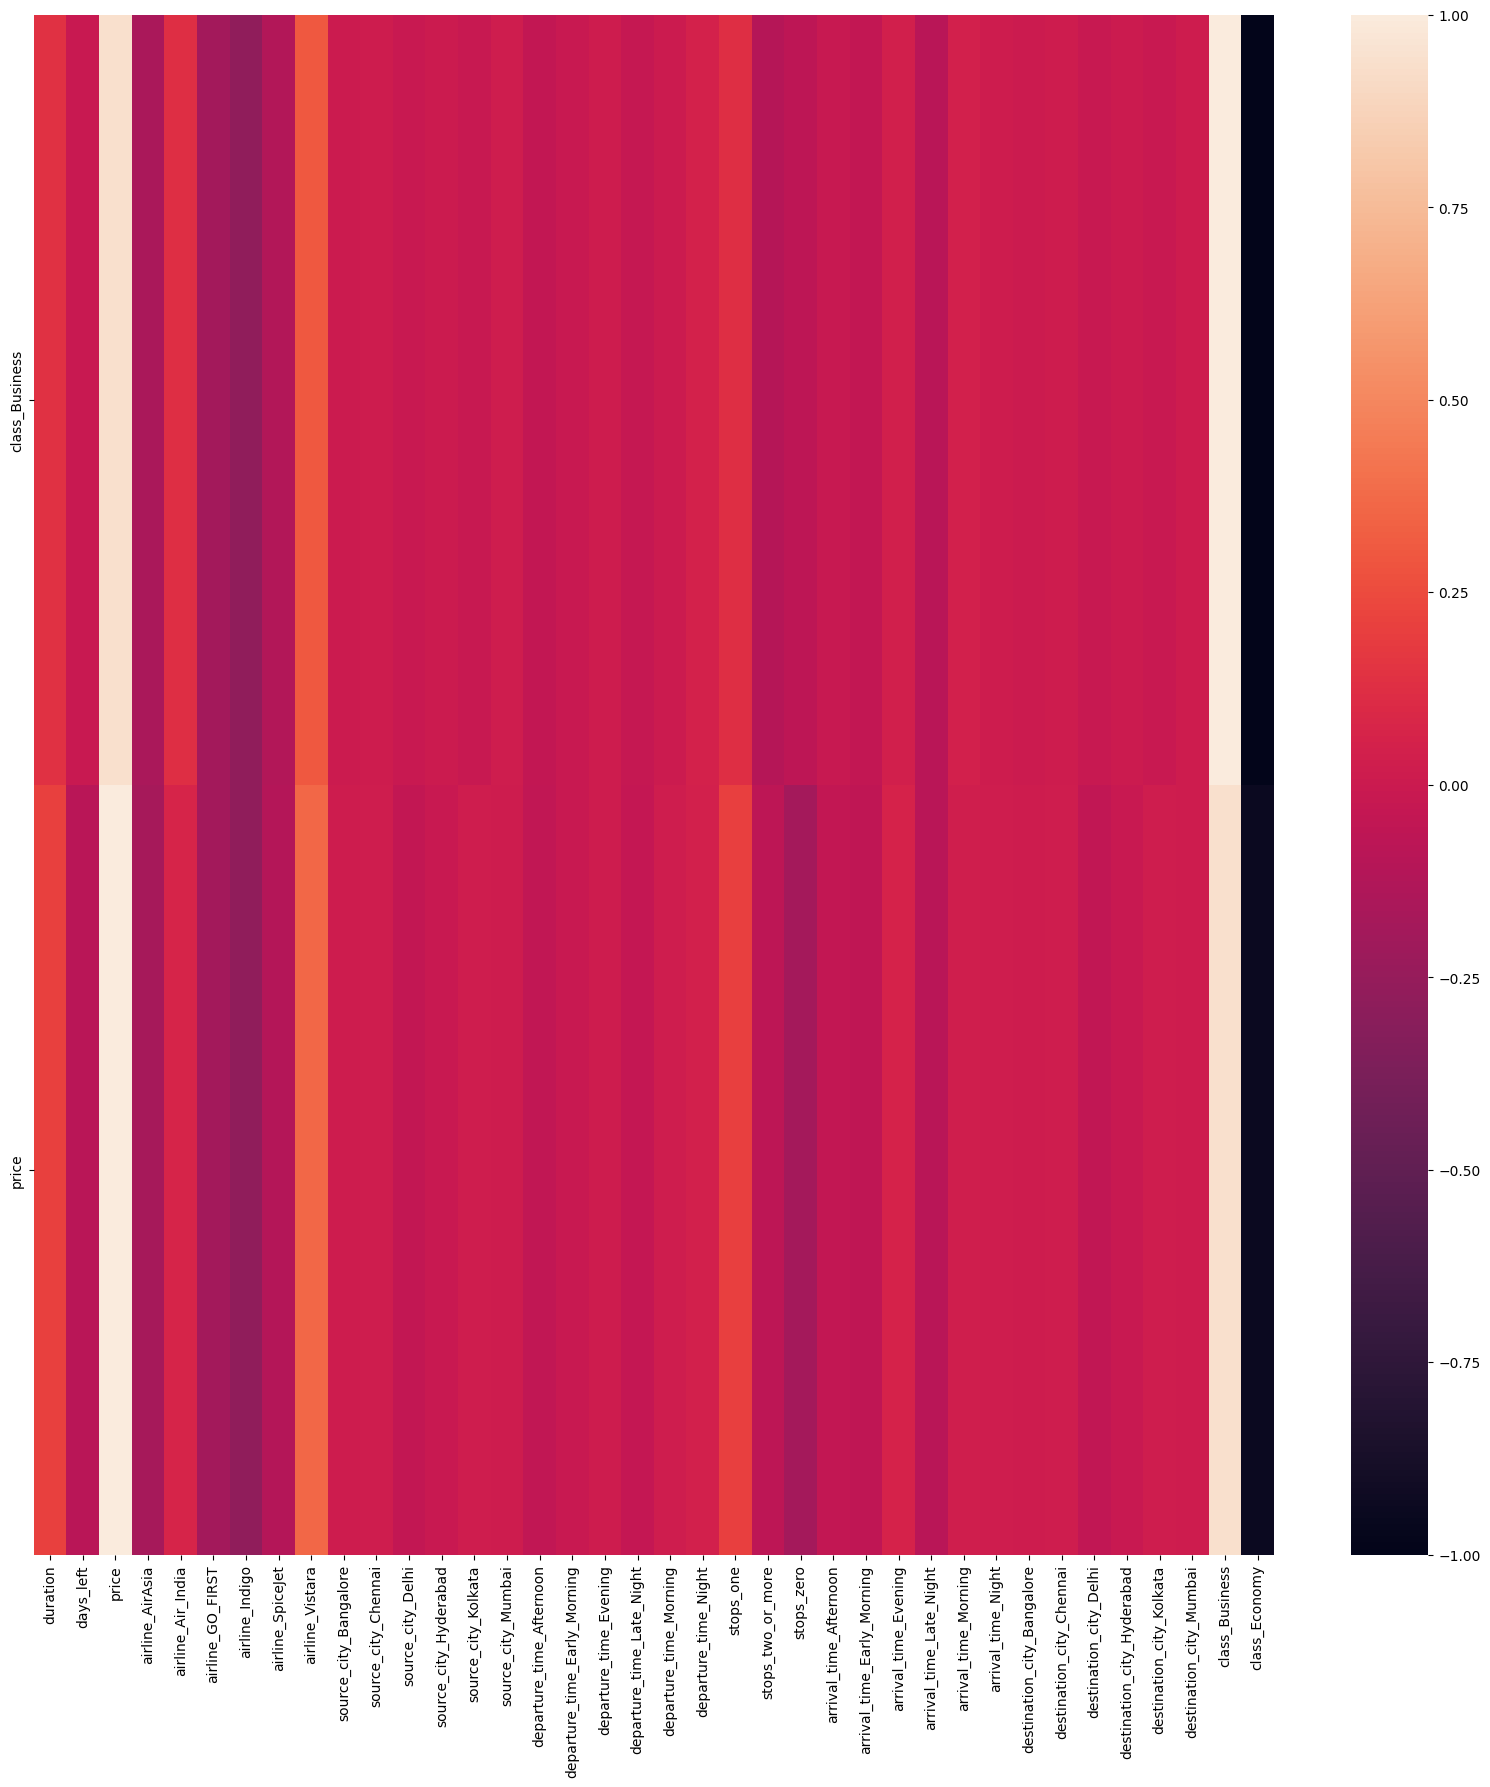

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

#drop columns




df = df.drop(['flight', 'Unnamed: 0'], axis=1)

df = pd.get_dummies(df)






corr = df.corr()

mask = corr['price'] > 0.5

# Use boolean mask to filter rows in correlation matrix
filtered_corr = corr[mask]


filtered_corr= filtered_corr.sort_values(by='price', ascending=True)

plt.figure(figsize=(20, 20)) # width and height in inches


sns.heatmap(filtered_corr)

plt.show()





In [35]:
corrcorr_matrix = df.corrwith(df['price']).sort_values(ascending=False)

In [36]:
corrcorr_matrix

price                           1.000000
class_Business                  0.937860
airline_Vistara                 0.360816
duration                        0.204222
stops_one                       0.199913
airline_Air_India               0.070041
arrival_time_Evening            0.056408
departure_time_Night            0.041768
arrival_time_Morning            0.030379
destination_city_Kolkata        0.020956
arrival_time_Night              0.020344
source_city_Chennai             0.018742
destination_city_Chennai        0.018473
departure_time_Morning          0.018199
source_city_Kolkata             0.016127
destination_city_Bangalore      0.014050
source_city_Mumbai              0.013206
source_city_Bangalore           0.011702
destination_city_Mumbai         0.010533
departure_time_Evening          0.007946
destination_city_Hyderabad     -0.008292
departure_time_Early_Morning   -0.012232
source_city_Hyderabad          -0.012828
departure_time_Late_Night      -0.033768
arrival_time_Aft

#### Insight

- The biggest price correlation significantly occur in business class.


#### Based on above heatmap

- On features shown as more corelated with Hearth disease

#### Positive Corelation:

- price                           
- class_Business                  
- airline_Vistara                 
- duration                        
- stops_one                       


#### Negative Corelation:

- stops_two_or_more             
- days_left                     
- arrival_time_Late_Night       
- airline_SpiceJet              
- airline_AirAsia               
- stops_zero                    
- airline_GO_FIRST              
- airline_Indigo                
- class_Economy                 

